# Gráficos

In [178]:
import pandas as pd
import matplotlib.pyplot as plt


cl = pd.read_csv('data/cl.csv', names=['n', 'm', 'block size', 'time to create the data', 'time to copy from host to device', 'time to execute simulation', 'time to copy from device to host', 'total time', 'version'])
cpu = pd.read_csv('data/cpu.csv', names=['n', 'm', 'time to create the data', 'time to execute simulation', 'total time', 'version'])
cuda = pd.read_csv('data/cuda.csv', names=['n', 'm', 'block size', 'time to create the data', 'time to copy from host to device', 'time to execute simulation', 'time to copy from device to host', 'total time'])
cuda_if = pd.read_csv('data/cuda_if.csv', names=['n', 'm', 'block size', 'time to create the data', 'time to copy from host to device', 'time to execute simulation', 'time to copy from device to host', 'total time'])

cl_if = cl[cl['version'] == 1]
cl = cl[cl['version'] == 0]
cpu_if = cpu[cpu['version'] == 1]
cpu = cpu[cpu['version'] == 0]

cuda_bs = cuda[cuda['block size'] % 10 == 0]
cuda = cuda[cuda['block size'] % 10 != 0]
cl_bs = cl[cl['block size'] % 10 == 0]
cl = cl[cl['block size'] % 10 != 0]


## Resultados
### Por tamaño de grilla 

In [179]:
# Avg the time for rows with the same n and m and block size
cl = cl.groupby(['n', 'm', 'block size']).mean().reset_index()
cl_if = cl_if.groupby(['n', 'm', 'block size']).mean().reset_index()
cuda = cuda.groupby(['n', 'm', 'block size']).mean().reset_index()
cuda_if = cuda_if.groupby(['n', 'm', 'block size']).mean().reset_index()
cpu = cpu.groupby(['n', 'm']).mean().reset_index()
cpu_if = cpu_if.groupby(['n', 'm']).mean().reset_index()

# add total size column
cl['total size'] = cl['n'] * cl['m']
cl_if['total size'] = cl_if['n'] * cl_if['m']
cuda['total size'] = cuda['n'] * cuda['m']
cuda_if['total size'] = cuda_if['n'] * cuda_if['m']
cpu['total size'] = cpu['n'] * cpu['m']
cpu_if['total size'] = cpu_if['n'] * cpu_if['m']

/var/folders/c_/nll2fhc95yg5g_83pmqqx06r0000gn/T/ipykernel_74587/98191722.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal_cl = [cl[cl['n'] == 16384][cl['m'] == 16000][cl['block size'] == i]['time to execute simulation'].values[0] for i in power_of_2]
/var/folders/c_/nll2fhc95yg5g_83pmqqx06r0000gn/T/ipykernel_74587/98191722.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal_cl = [cl[cl['n'] == 16384][cl['m'] == 16000][cl['block size'] == i]['time to execute simulation'].values[0] for i in power_of_2]
/var/folders/c_/nll2fhc95yg5g_83pmqqx06r0000gn/T/ipykernel_74587/98191722.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal_cl = [cl[cl['n'] == 16384][cl['m'] == 16000][cl['block size'] == i]['time to execute simulation'].values[0] for i in power_of_2]
/var/folders/c_/nll2fhc95yg5g_83pmqqx06r0000gn/T/ipykernel_74587/98191722.py:4: UserWarning: Boolean Series key will be r

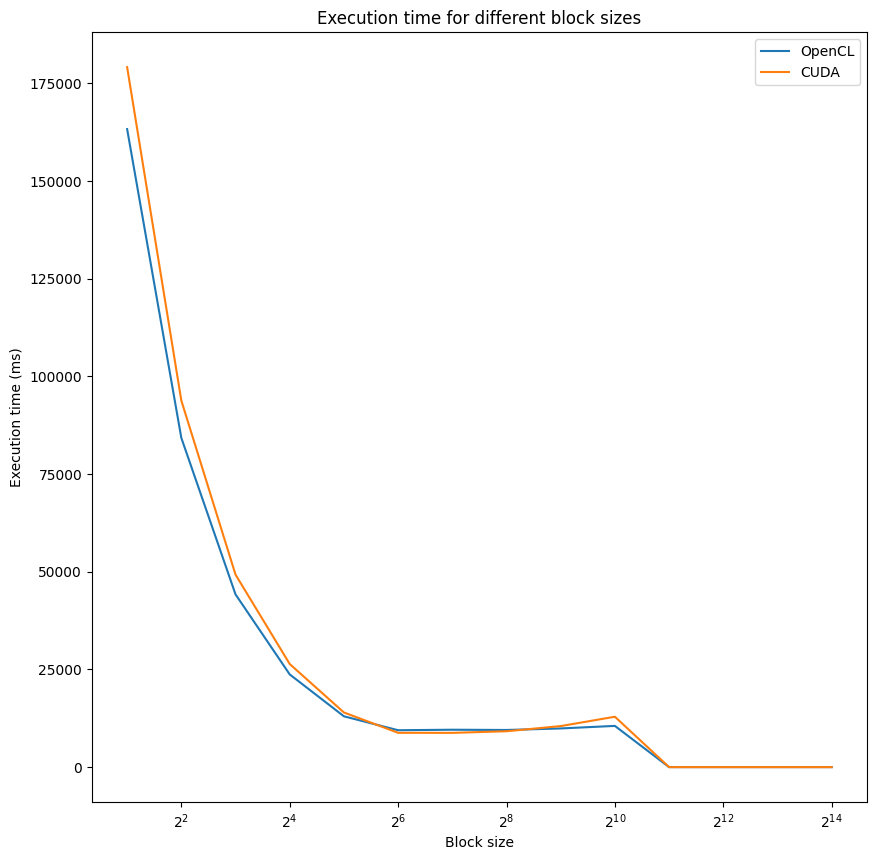

In [180]:
# Plot the ideal block size for cuda and cl
# Set for n = 16384 and m = 16000 and block size a power of 2
power_of_2 = [2**i for i in range(1, 15)]
ideal_cl = [cl[cl['n'] == 16384][cl['m'] == 16000][cl['block size'] == i]['time to execute simulation'].values[0] for i in power_of_2]
ideal_cuda = [cuda[cuda['n'] == 16384][cuda['m'] == 16000][cuda['block size'] == i]['time to execute simulation'].values[0] for i in power_of_2]



plt.figure(figsize=(10, 10))
plt.title('Execution time for different block sizes')
plt.xlabel('Block size')
plt.ylabel('Execution time (ms)')
plt.plot(power_of_2, ideal_cl, label='OpenCL')
plt.plot(power_of_2, ideal_cuda, label='CUDA')
# log2 scale for x axis
plt.xscale('log', base=2)
plt.legend()
plt.savefig('plots/block_size.pdf')
plt.show()


Como se pude ver, los minimos locales se alcanzan en exponente 6 y 11, es por esto que se decide separar los datos con los que tiene block size menor a 2048 y los que tienen mayor o igual a este.

In [181]:
# Split data in two dataframes, one for block size below 2048 and one for block size above 2048
cl_2048 = cl[cl['block size'] < 2048]
cl_2048_plus = cl[cl['block size'] >= 2048]
cuda_2048 = cuda[cuda['block size'] < 2048]
cuda_2048_plus = cuda[cuda['block size'] >= 2048]
cpu_2048 = cpu[cpu['n'] < 2048]
cpu_2048_plus = cpu[cpu['n'] >= 2048]

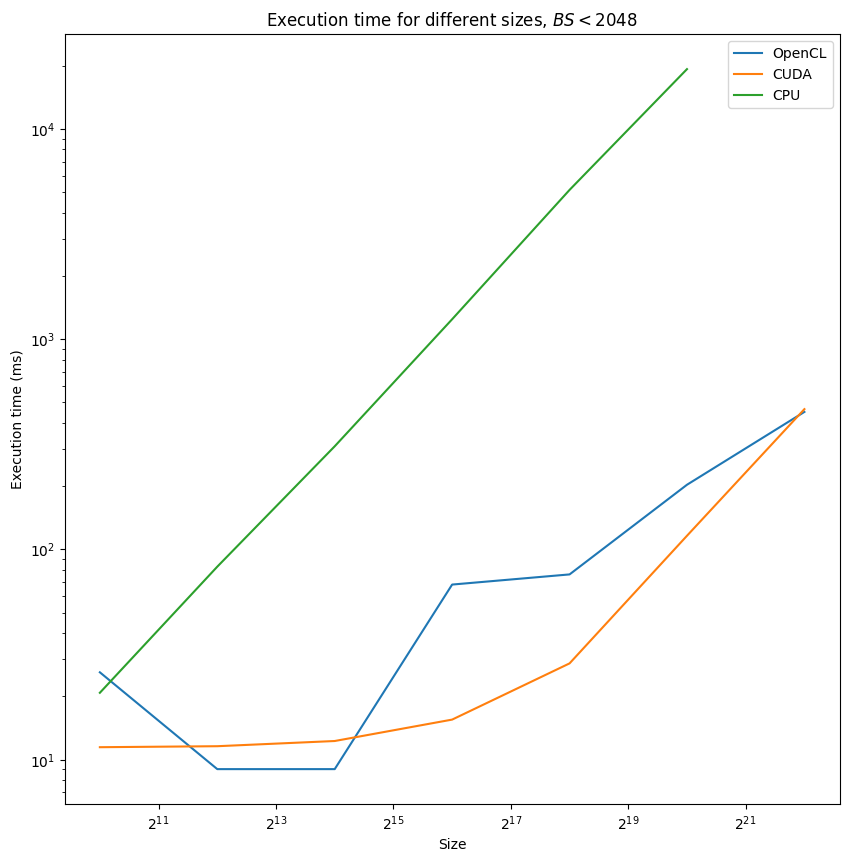

In [182]:
# Plot the execution time for different sizes with equal n and m for bs < 2048

precl_y = cl_2048[cl_2048['n'] == cl_2048['m']]['total time']
precl_x = cl_2048[cl_2048['n'] == cl_2048['m']]['total size']
precuda_y = cuda_2048[cuda_2048['n'] == cuda_2048['m']]['total time']
precuda_x = cuda_2048[cuda_2048['n'] == cuda_2048['m']]['total size']
precpu_y = cpu_2048[cpu_2048['n'] == cpu_2048['m']]['total time']
precpu_x = cpu_2048[cpu_2048['n'] == cpu_2048['m']]['total size']

plt.figure(figsize=(10, 10))
plt.title('Execution time for different sizes, $BS < 2048$')
plt.xlabel('Size')
plt.ylabel('Execution time (ms)')
plt.plot(precl_x, precl_y, label='OpenCL')
plt.plot(precuda_x, precuda_y, label='CUDA')
plt.plot(precpu_x, precpu_y, label='CPU')
plt.yscale('log')
plt.xscale('log', base=2)
plt.legend()
plt.savefig('plots/pre_cpuvsgpu.pdf')
plt.show()

In [183]:
cl_2048_size = cl_2048.groupby(['total size']).mean().reset_index()
cl_2048_plus_size = cl_2048_plus.groupby(['total size']).mean().reset_index()
cuda_2048_size = cuda_2048.groupby(['total size']).mean().reset_index()
cuda_2048_plus_size = cuda_2048_plus.groupby(['total size']).mean().reset_index()
cpu_2048_size = cpu_2048.groupby(['total size']).mean().reset_index()
cpu_2048_plus_size = cpu_2048_plus.groupby(['total size']).mean().reset_index()

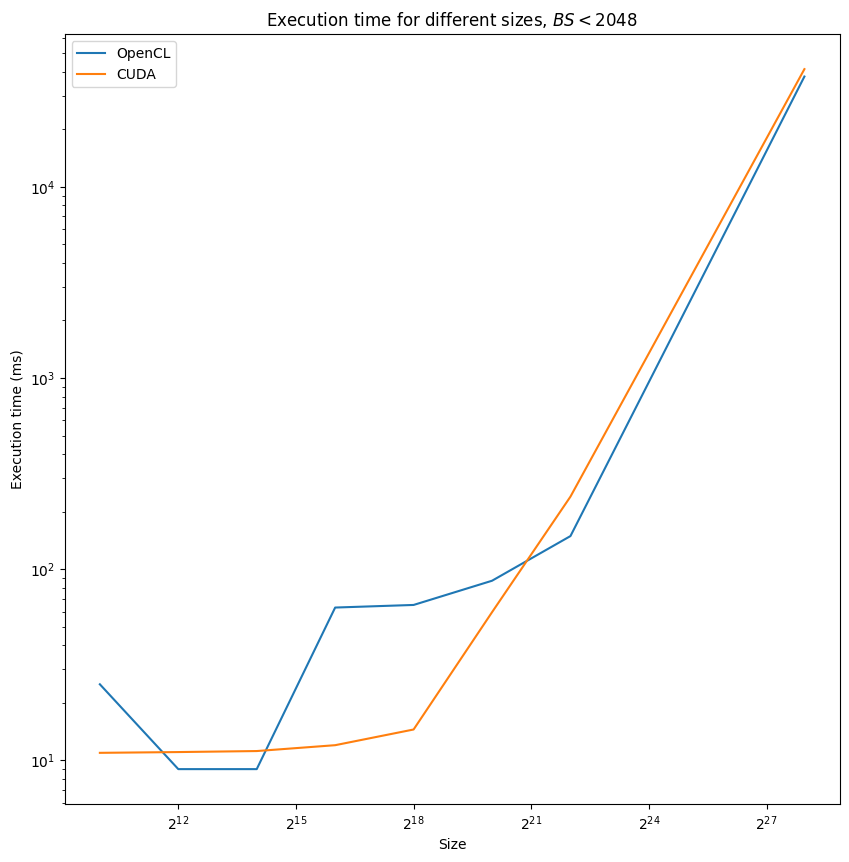

In [194]:
# cl vs cuda

plt.figure(figsize=(10, 10))
plt.title('Execution time for different sizes, $BS < 2048$')
# x label express as a power of 2
plt.xlabel('Size')
plt.xscale('log', base=2)
plt.ylabel('Execution time (ms)')
plt.yscale('log')
plt.plot(cl_2048_size['total size'], cl_2048_size['time to execute simulation'], label='OpenCL')
plt.plot(cuda_2048_size['total size'], cuda_2048_size['time to execute simulation'], label='CUDA')
plt.legend()
plt.savefig('plots/pre_clvscuda.pdf')
plt.show()

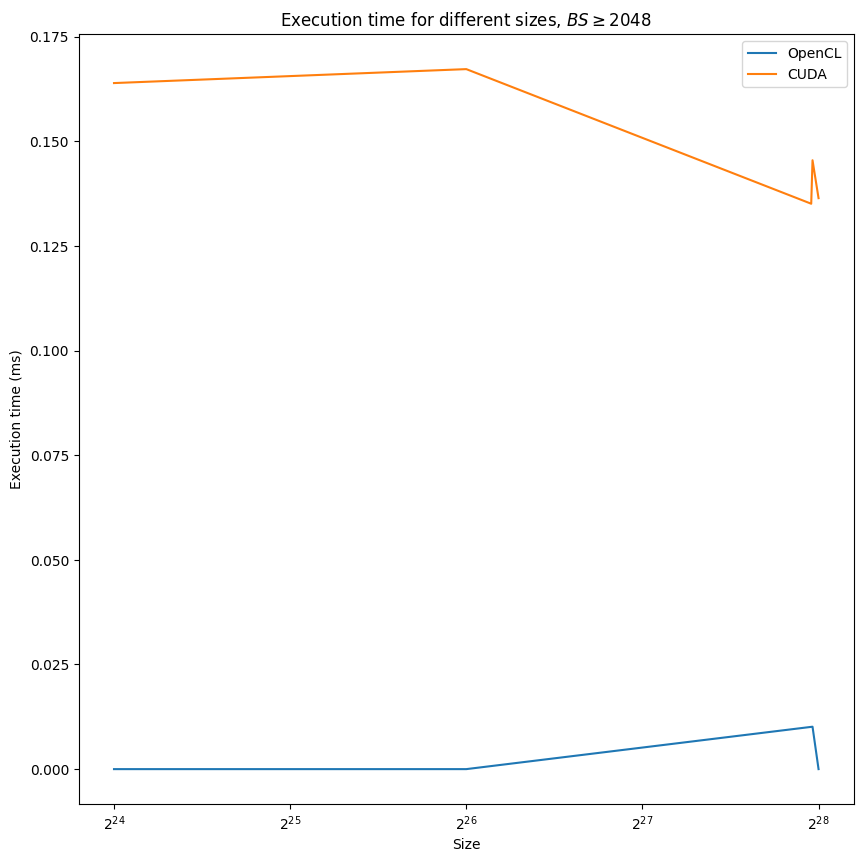

In [185]:
# Post 2048
plt.figure(figsize=(10, 10))
plt.title('Execution time for different sizes, $BS \geq 2048$')
plt.xlabel('Size')
plt.xscale('log', base=2)
plt.ylabel('Execution time (ms)')
plt.plot(cl_2048_plus_size['total size'], cl_2048_plus_size['time to execute simulation'], label='OpenCL')
plt.plot(cuda_2048_plus_size['total size'], cuda_2048_plus_size['time to execute simulation'], label='CUDA')
plt.legend()
plt.savefig('plots/post_clvscuda.pdf')
plt.show()

### If vs no if

In [186]:
clif_2048_size = cl_if[cl_if['block size'] < 2048].groupby(['total size']).mean().reset_index()
clif_2048_plus_size = cl_if[cl_if['block size'] >= 2048].groupby(['total size']).mean().reset_index()
cudif_2048_size = cuda_if[cuda_if['block size'] < 2048].groupby(['total size']).mean().reset_index()
cudif_2048_plus_size = cuda_if[cuda_if['block size'] >= 2048].groupby(['total size']).mean().reset_index()
cpuif_2048_size = cpu_if[cpu_if['n'] < 2048].groupby(['total size']).mean().reset_index()
cpuif_2048_plus_size = cpu_if[cpu_if['n'] >= 2048].groupby(['total size']).mean().reset_index()


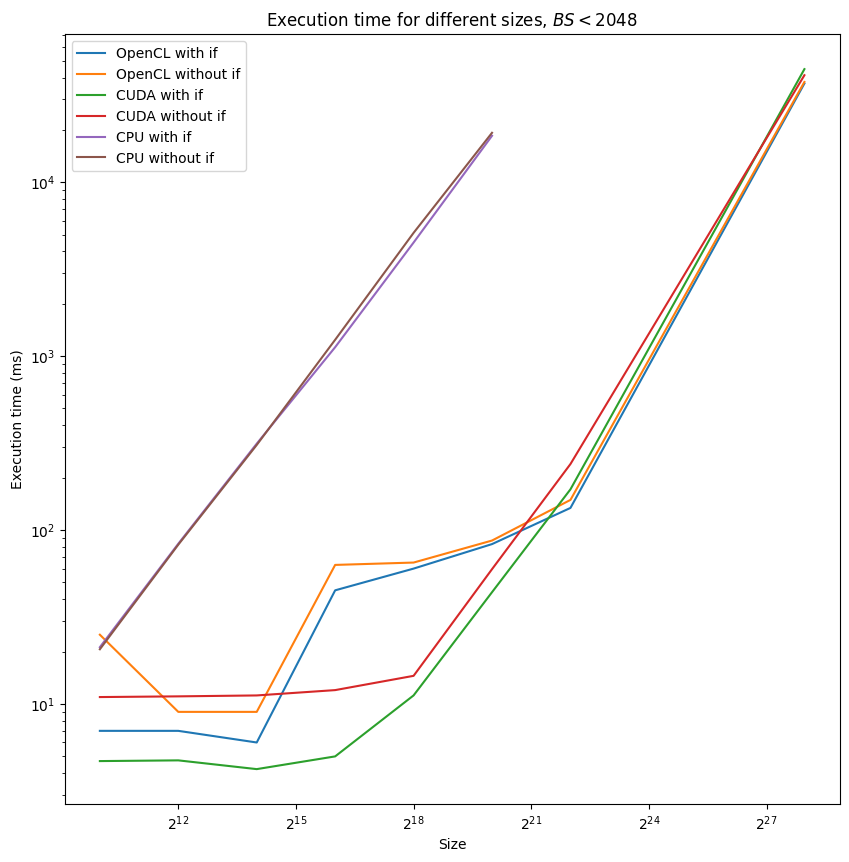

In [187]:
# version 1 vs version 0
plt.figure(figsize=(10, 10))
plt.title('Execution time for different sizes, $BS < 2048$')
plt.xlabel('Size')
plt.xscale('log', base=2)
plt.ylabel('Execution time (ms)')
plt.yscale('log')
plt.plot(clif_2048_size['total size'], clif_2048_size['time to execute simulation'], label='OpenCL with if')
plt.plot(cl_2048_size['total size'], cl_2048_size['time to execute simulation'], label='OpenCL without if')
plt.plot(cudif_2048_size['total size'], cudif_2048_size['time to execute simulation'], label='CUDA with if')
plt.plot(cuda_2048_size['total size'], cuda_2048_size['time to execute simulation'], label='CUDA without if')
plt.plot(cpuif_2048_size['total size'], cpuif_2048_size['time to execute simulation'], label='CPU with if')
plt.plot(cpu_2048_size['total size'], cpu_2048_size['time to execute simulation'], label='CPU without if')
plt.legend()
plt.legend()
plt.savefig('plots/pre_ifnoif.pdf')
plt.show()

### Por Block Size

In [188]:
clbs_2000_bs = cl_bs[cl_bs['block size'] < 2000].groupby(['block size']).mean().reset_index()
clbs_2000_plus_bs = cl_bs[cl_bs['block size'] >= 2000].groupby(['block size']).mean().reset_index()
cudabs_2000_bs = cuda_bs[cuda_bs['block size'] < 2000].groupby(['block size']).mean().reset_index()
cudabs_2000_plus_bs = cuda_bs[cuda_bs['block size'] >= 2000].groupby(['block size']).mean().reset_index()

cl_2048_bs = cl_2048[cl_2048['block size'] >= 10].groupby(['block size']).mean().reset_index()
cl_2048_plus_bs = cl_2048_plus[cl_2048_plus['block size'] >= 10].groupby(['block size']).mean().reset_index()
cuda_2048_bs = cuda_2048[cuda_2048['block size'] >= 10].groupby(['block size']).mean().reset_index()
cuda_2048_plus_bs = cuda_2048_plus[cuda_2048_plus['block size'] >= 10].groupby(['block size']).mean().reset_index()

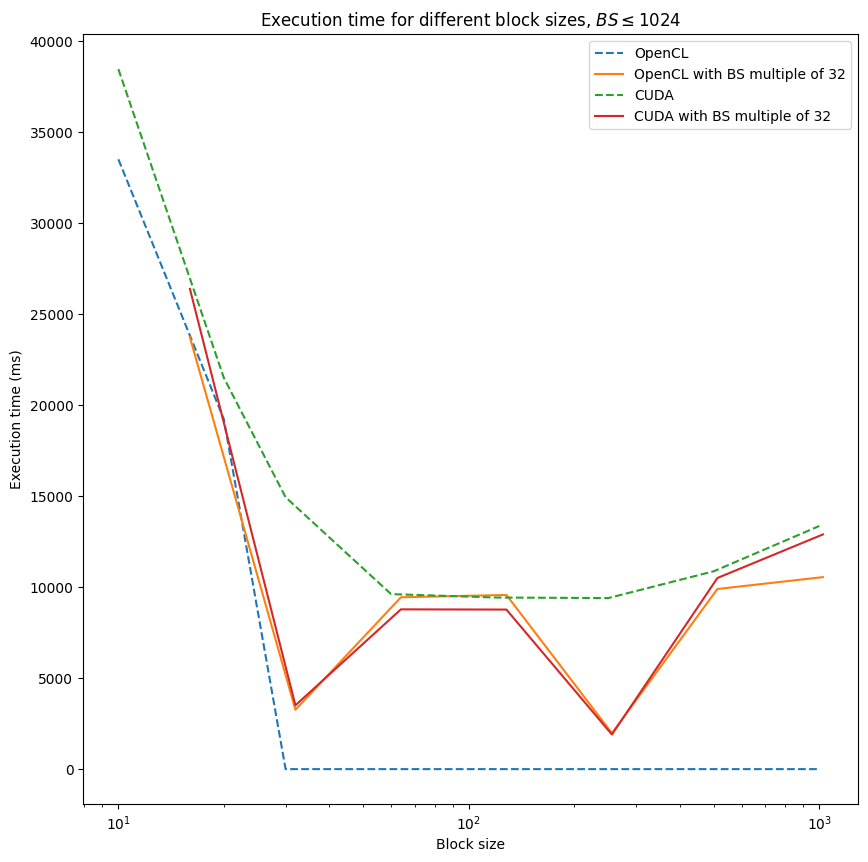

In [189]:
plt.figure(figsize=(10, 10))
plt.title('Execution time for different block sizes, $BS \leq 1024$')
plt.xlabel('Block size')
plt.xscale('log', base=10)
plt.ylabel('Execution time (ms)')
plt.plot(clbs_2000_bs['block size'], clbs_2000_bs['time to execute simulation'], '--', label='OpenCL')
plt.plot(cl_2048_bs['block size'], cl_2048_bs['time to execute simulation'], label='OpenCL with BS multiple of 32')
plt.plot(cudabs_2000_bs['block size'], cudabs_2000_bs['time to execute simulation'], '--', label='CUDA')
plt.plot(cuda_2048_bs['block size'], cuda_2048_bs['time to execute simulation'], label='CUDA with BS multiple of 32')
plt.legend()
plt.savefig('plots/pre_32no32.pdf')
plt.show()

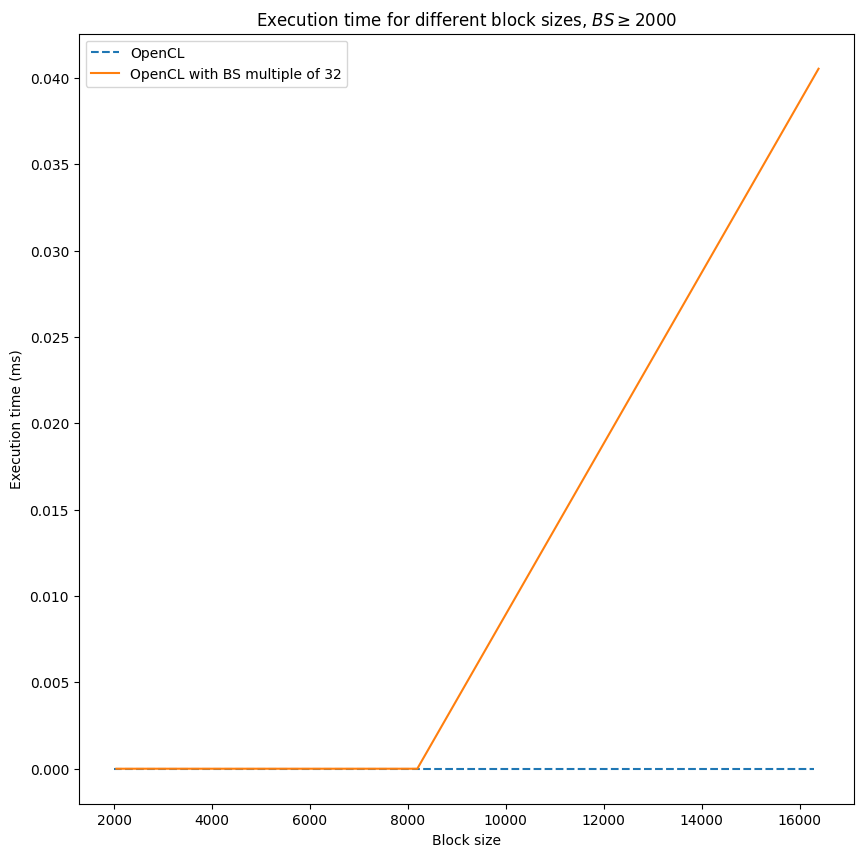

In [190]:
plt.figure(figsize=(10, 10))
plt.title('Execution time for different block sizes, $BS \geq 2000$')
plt.xlabel('Block size')
plt.ylabel('Execution time (ms)')
plt.plot(clbs_2000_plus_bs['block size'], clbs_2000_plus_bs['time to execute simulation'], '--', label='OpenCL')
plt.plot(cl_2048_plus_bs['block size'], cl_2048_plus_bs['time to execute simulation'], label='OpenCL with BS multiple of 32')
plt.legend()
plt.savefig('plots/post_32no32.pdf')
plt.show()


## Analisis extra

In [191]:
cl_size = cl.groupby(['total size']).mean().reset_index()
cuda_size = cuda.groupby(['total size']).mean().reset_index()

## Speed-up

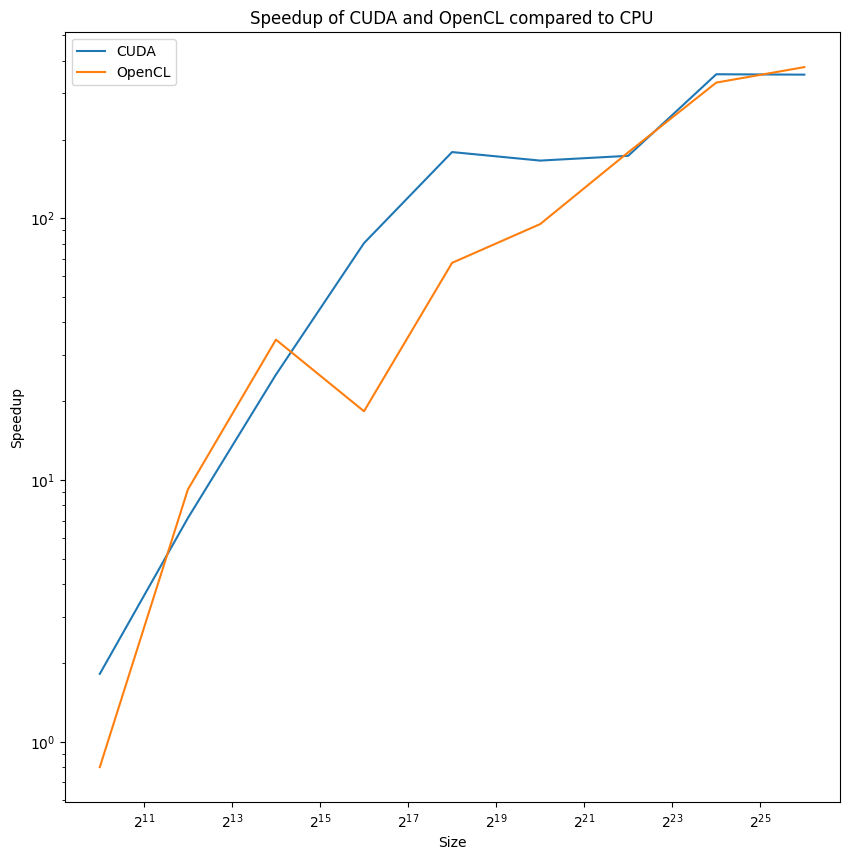

In [192]:
cpu_size = cpu.groupby(['total size']).mean().reset_index()

# Make a dataframe with the sizes of the cpu, and the total time of cuda, opencl and cpu
df_speedup = pd.DataFrame({'total size': cpu_size['total size'],
                           'cuda time': cuda_size[cuda_size['total size'].isin(cpu_size['total size'])]['total time'],
                           'opencl time': cl_size[cl_size['total size'].isin(cpu_size['total size'])]['total time'],
                           'cpu time': cpu_size['total time']})

# Calculate the speedup of cuda and opencl
df_speedup['cuda speedup'] = df_speedup['cpu time'] / df_speedup['cuda time']
df_speedup['opencl speedup'] = df_speedup['cpu time'] / df_speedup['opencl time']

# Plot the speedup
plt.figure(figsize=(10, 10))
plt.title('Speedup of CUDA and OpenCL compared to CPU')
plt.xlabel('Size')
plt.xscale('log', base=2)
plt.ylabel('Speedup')
plt.yscale('log')
plt.plot(df_speedup['total size'], df_speedup['cuda speedup'], label='CUDA')
plt.plot(df_speedup['total size'], df_speedup['opencl speedup'], label='OpenCL')
plt.legend()
plt.savefig('plots/speedup.pdf')
plt.show()

In [193]:
# Avg speedup
print('Avg speedup CUDA: ', df_speedup['cuda speedup'].mean())
print('Avg speedup OpenCL: ', df_speedup['opencl speedup'].mean())


Avg speedup CUDA:  149.19007328343963
Avg speedup OpenCL:  123.60905140513258
